## Poisson's Equation

$\nabla^2\phi = f$ where f is a source term but in terms of electrostatics we consider,

$\nabla^2\phi = -\frac{\rho}{\epsilon_0}$ where $\phi$ is the electric potential, $\rho$ is the charge density, and $\epsilon$ is the material's permitivitty. 

In case of the presence of bound charges we note that $\rho_total = \rho_bound + \rho$ where $\rho_bound = -\nabla P$ where $P$ is the Polarization. 

This leads to the complete Poisson's equation: $\epsilon_0 \nabla \cdot (\epsilon_r (\nabla \phi) ) = \nabla P - \rho$

For the purposes of this document we consider the case of a source term to keep things general.

#### Derivation

Focusing on electrostatics, we start from the differential form of Gauss' Law which states that the charge density equals to the spatial derivative of the electric displacement field, D. 

$\nabla D = \rho$

We also know that $D = \epsilon E + P$ where E is the electric field and P is polarization, and $\epsilon = \epsilon_0 \epsilon_r$. The electric field is derived from the electric potential as $E = - \nabla \phi$, therefore we can conclude the following: 

$\nabla D = \rho$ 


$=>\nabla (\epsilon (-\nabla \phi) + P) = \rho$


$=> -\epsilon \nabla^2 \phi + \nabla P = \rho$


$=>\epsilon \nabla^2 \phi = \nabla P - \rho$


The reason why the $\epsilon$ was distributed the way it is in the complete equation is because $\epsilon_r$ can be spatially varying allowing us to apply the del operator on it.

#### Solution

First, let's consider the simplest system, that of a point charge $+q$ at the center of a spherical surface of radius r. Now Coulomb's Law doesn't directly apply to this system since there is no second point charge to describe the force between in consideration. However, a single point charge still has an electric field which will pose some force to any entering charge so we can derive the electric field of a point charge from the following:

Coulomb's Law: $F = k \frac{q_0 \cdot q_1}{d^2}$ where d is the distance between the two point charges.

From Gauss' Law: $\oint_S \mathbf{E} \cdot d\mathbf{A} = \frac{q_{enc}}{\epsilon_0}$ 

For our system we can write Gauss' Law as: $E\cdot4\pi r^2 = \frac{q}{\epsilon_0}$

Therefore, $E = k\frac{q}{r^2}$ where $k = \frac{1}{4\pi \epsilon_0}$. Notice how this is also $E = \frac{F}{q_0}$ thereby indicating that a point charge with an electric field E will generate an electric force between itself and another point charge $q_0$ trying to enter its field.

Finally, now to arrive at the electric potential due to a point charge. From $E = \frac{\phi}{d}$ where $d = r$ in our system, we have $\phi = \frac{q}{4\pi \epsilon_0 r}$

For multiple point charges we can sum over each to arrive $\phi_{total} = \frac{1}{4\pi \epsilon_0} \sum \frac{q_i}{r_i}$. For continuous charge distributions, $\phi_{total} = \frac{1}{4\pi \epsilon_0} \int_V \frac{\rho(r_1)}{r_2 - r_1}\cdot d\mathbf{V}$

To solve Poisson's equation we employ Green's function which puts forth that the Laplacian operator applied on a function $G(r, r')$ is such that:

$\nabla^2 G(r, r') = \delta(r-r')$

We also know that, $\iint\limits_{S} \vec{F}\cdot\hat{n} d \mathbf{S} = \int\int\int\limits_{V} \nabla\cdot\vec{F} d \mathbf{V}$
so if we let $F = v\nabla u$ then 

$\iint\limits_{S} (v\nabla u)\cdot\hat{n} d \mathbf{S} = \int\int\int\limits_{V} \nabla(v\nabla u)d \mathbf{V}$


$=> \iint\limits_{S} (v\frac{du}{dn} - u\frac{dv}{dn}) d \mathbf{S} = \int\int\int\limits_{V} \nabla v \nabla ud \mathbf{V} + \int\int\int\limits_{V} v \nabla^2 ud \mathbf{V}$


Connecting this back to Poisson's equation $\phi(r) = \rho(r)$ we use the Green's function to split up $f(x,y,z)$ into multiple impulses with $G(r,r')$ representing the solution to the electric potential as $\phi(r) = \int G(r,r') \rho(r') d^3r'$ as the convolution of $G(r,r')$ over the entire volume.

Now how do we solve for $G(r,r')$? There are different cases for 2-D and 3-D. Both involve viewing $G(r) as \phi(r)$ since it is the solution. First solving in three dimensions:

$\nabla^2G(r) = \frac{1}{r^2}\frac{d}{dr}(r^2\frac{dG(r)}{dr}) = -\delta(r)$
$=> r^2\frac{dG(r)}{dr} = -\int r^2 \delta(r) d\mathbf{r}$

Solving at origin first, $ -\int r^2 \delta(r) d\mathbf{r} = -1$ 

$=> \frac{dG(r)}{dr} = \frac{-1}{r^2}$
$=> G(r) = \frac{1}{r} + C$

In free space $C = 0$. Therefore $G(r,r') = \frac{1}{\|{r - r'}\|}$

In two dimensions however the solution is slightly different where we follow a similar process and arrive at $G(r,r') = \frac{ln(r)}{2\pi}$



#### References

https://www.damtp.cam.ac.uk/user/reh10/lectures/nst-mmii-chapter2.pdf
https://eng.libretexts.org/Bookshelves/Electrical_Engineering/Electro-Optics/Book%3A_Electromagnetics_I_(Ellingson)/05%3A_Electrostatics/5.15%3A_Poisson%E2%80%99s_and_Laplace%E2%80%99s_Equations
Schaum's Outline of Electromagnetics, 4th edition

Error:  0.0024753793252085096


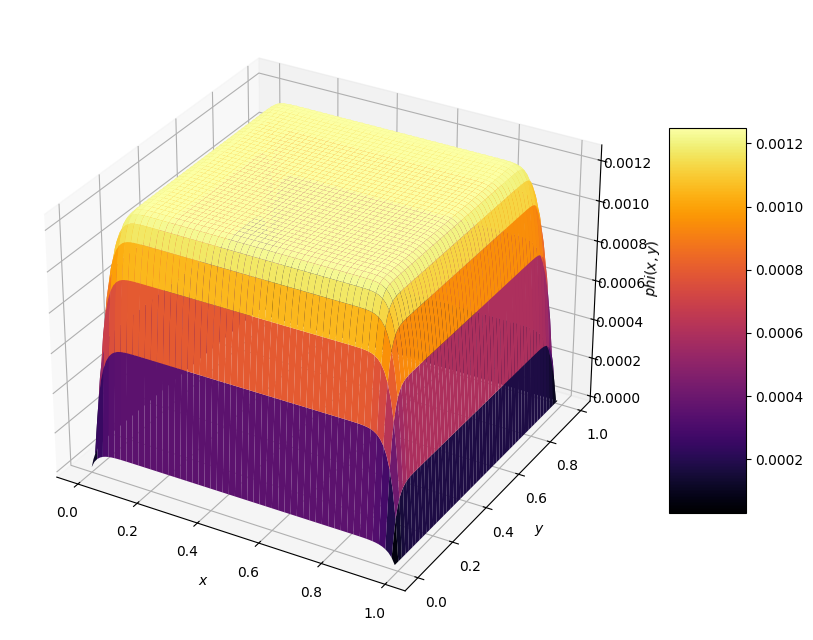

In [1]:

import numpy as np
import matplotlib.pyplot as plt
modes = 1
L_x = 1.0
L_y = 1.0
n_x = 100
n_y = 100

del_x = L_x / n_x
del_y = L_y / n_y

x = np.arange(0, L_x, del_x)
y = np.arange(0, L_y, del_y)

X, Y = np.meshgrid(x, y)

source = np.zeros([n_y, n_x])
phi = np.zeros([n_y, n_x])
source[1:-1, 1:-1] = 1
# phi(y, x)
tol = 1e-5
err = 1e10
max_cnt = 50
cntr = 0
while err > tol and cntr < max_cnt:
    phi_k = phi.copy()

    phi_k[0,:]  = 0 # Bottom
    phi_k[:,-1] = 0 # Right
    phi_k[:,0]  = 0 # Left
    #phi_k[10:-10, 10:-10] = np.sin(np.pi * x[:80])

    for itr_x in range(0, n_x - 1):
        for itr_y in range(0, n_y - 1):
            phi[itr_y, itr_x] = source[itr_y, itr_x] * ((del_x ** 2) * (del_y ** 2)) / (2 * (del_x ** 2 + del_y ** 2)) + (phi_k[itr_y, itr_x + 1] + phi_k[itr_y, itr_x - 1]) * (del_y ** 2) / (2 * (del_x ** 2 + del_y ** 2)) + (phi_k[itr_y + 1, itr_x] + phi_k[itr_y - 1, itr_x]) * (del_y ** 2) / (2 * (del_x ** 2 + del_y ** 2))
    
    diff = phi - phi_k
    err = np.linalg.norm(diff, 2)
    cntr += 1
    #print(phi)

if cntr == max_cnt:
    print("Error: ", err)
else:
    print("Iterations till convergence: ", cntr)
#plt.contourf(X, Y, phi, cmap="inferno", levels=10)
#plt.colorbar()
#plt.xlabel("X")
#plt.ylabel("Y")
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, phi, cmap='inferno')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$phi(x, y)$')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

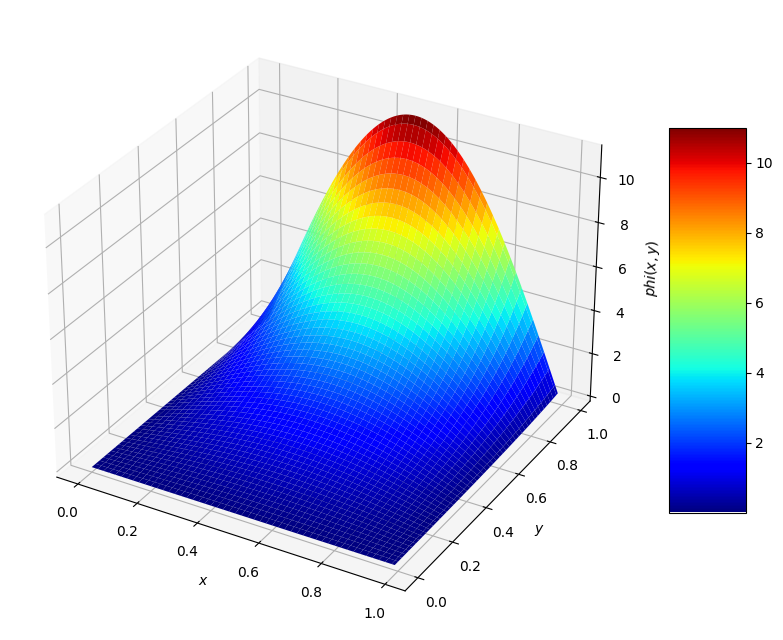

In [26]:

import numpy as np
import matplotlib.pyplot as plt

L_x = 1
L_y = 1
k = 1
n_x = 100
n_y = 100
del_x = L_x / n_x
del_y = L_y / n_y
x = np.arange(0, L_x, del_x)
y = np.arange(0, L_y, del_y)

X, Y = np.meshgrid(x, y)

phi = np.sin(k * np.pi * X) * np.sinh(k * np.pi * Y)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, phi, cmap='jet')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$phi(x, y)$')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()

Text(0, 0.5, 'Y')

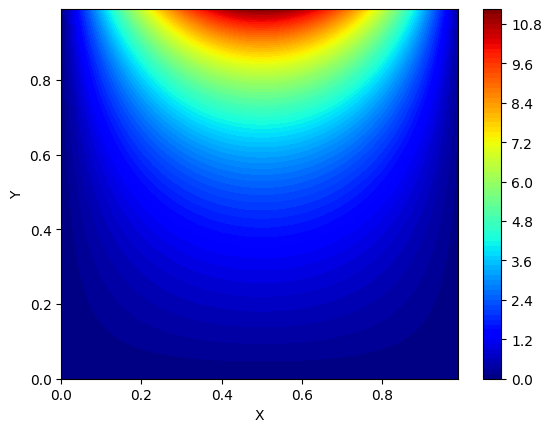

In [27]:
plt.contourf(X, Y, phi, cmap="jet", levels=100)
plt.colorbar()
plt.xlabel("X")
plt.ylabel("Y")

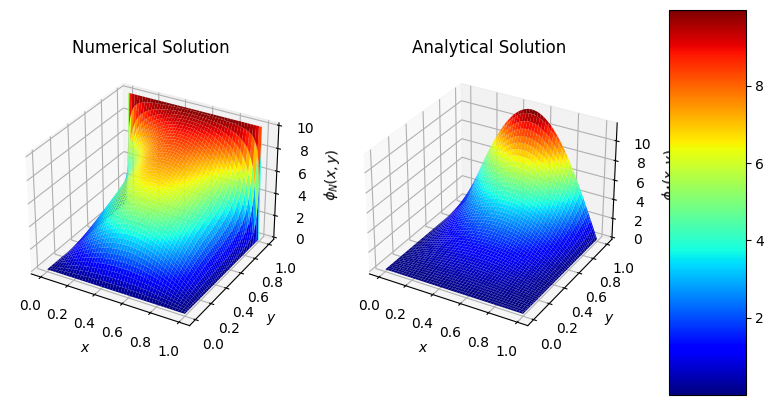

In [83]:
import numpy as np
import matplotlib.pyplot as plt

L_x = 1
L_y = 1

k = 1
n_x = 100
n_y = 100

del_x = L_x / n_x
del_y = L_y / n_y

x = np.linspace(0, L_x, n_x)
y = np.linspace(0, L_y, n_y)
X, Y = np.meshgrid(x, y)

phi_analytical = np.sin(k * np.pi * X) * np.sinh(k * np.pi * Y)

phi_numerical = np.ones_like(phi_analytical)

# constant = 1
# phi_numerical[:, 0] = constant  # Left 
# phi_numerical[:, -1] = constant # Right
# phi_numerical[0, :] = constant # Bottom
# phi_numerical[-1, :] = constant # Top


source = np.zeros_like(phi_numerical)
max_cntr = 1000
tol = 1e-5
for cntr in range(max_cntr):
        constant = 0
        phi_numerical[:, 0] =constant  # Left 
        phi_numerical[:, -1] =constant # Right
        phi_numerical[0, :] =constant # Bottom

        phi_new = np.copy(phi_numerical)
        for itr_x in range(1, n_x-1):
            for itr_y in range(1, n_y-1):
                phi_new[itr_y, itr_x] = (phi_new[itr_y, itr_x + 1] + phi_new[itr_y, itr_x - 1]) * (del_y ** 2) / (2 * (del_x ** 2 + del_y ** 2)) + (phi_new[itr_y + 1, itr_x] + phi_new[itr_y - 1, itr_x]) * (del_y ** 2) / (2 * (del_x ** 2 + del_y ** 2))
                
        if np.linalg.norm(phi_new - phi_numerical, 2) < tol:
            print(f"Converged after {cntr+1} iterations")
            break
        phi_numerical = phi_new 

#  if cntr >= max_cntr and np.linalg.norm(phi_new - phi_numerical, 2) >= tol:
#     print(f"Did not converge and error: { np.linalg.norm(phi_new - phi_numerical, 2)}")
# NUMERICAL
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(121, projection='3d')
surf1 = ax.plot_surface(X, Y, phi_numerical, cmap='jet')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$\phi_{N}(x, y)$')
ax.set_title('Numerical Solution')

# ANALYTICAL
ax = fig.add_subplot(122, projection='3d')
surf2 = ax.plot_surface(X, Y, phi_analytical, cmap='jet')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$\phi_{A}(x, y)$')
ax.set_title('Analytical Solution')

fig.colorbar(surf1, ax=fig.get_axes(), shrink=0.5, aspect=5)

plt.show()


In [55]:
np.max(phi_numerical) , np.min(phi_numerical)


(11.547285690571037, 0.0)

In [56]:
np.max(phi_analytical), np.min(phi_analytical)

(11.547285690571037, 0.0)

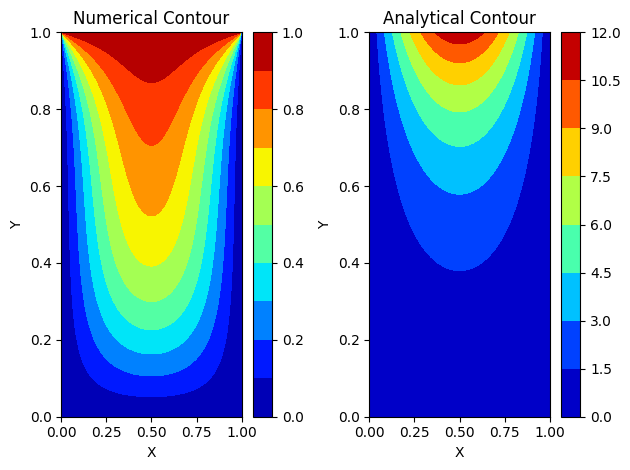

In [85]:
fig, axs = plt.subplots(1, 2)
phi_n_contour = axs[0].contourf(X, Y, phi_numerical, cmap="jet", levels=10)
axs[0].set_title("Numerical Contour")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")
fig.colorbar(phi_n_contour, ax=axs[0])

phi_a_contour = axs[1].contourf(X, Y, phi_analytical, cmap="jet", levels=10)
axs[1].set_title("Analytical Contour")
axs[1].set_xlabel("X")
axs[1].set_ylabel("Y")
fig.colorbar(phi_a_contour, ax=axs[1])

plt.tight_layout()
plt.show()

Green's function
point charge potential and how we can derive the field from poisson (GF)
diff solve for valid non-trivial rho (GF)
scale match; numerical should hold irrespective of IC

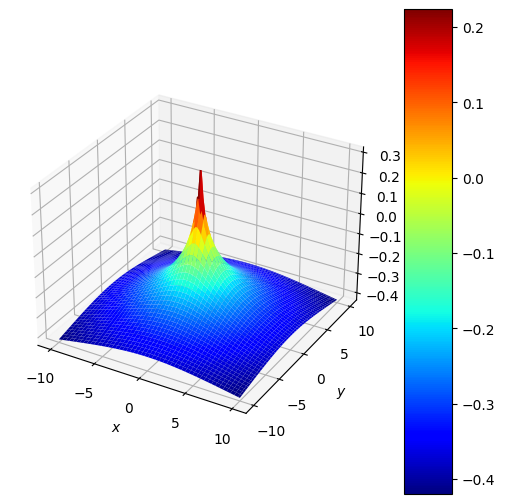

In [23]:
# 2D poisson equation with source function = 1 throughout domain for domain (10, 10)
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)
h = x[1] - x[0] #dx = dy
phi = np.zeros((len(x), len(y)))


for i in range(len(x)):
    for j in range(len(y)):

        r = np.sqrt( (x[i]) ** 2 + (y[j]) ** 2 )
        phi[i,j] = np.log(r) / (-2 *np.pi) 
# phi[:, 0] = 0
# phi[:, -1] = 0
# phi[0, :] = 0
# phi[-1, :] = 0

#phi = np.log(np.sqrt(X**2 + Y**2)) * (X ** 2 + Y ** 2) / 2
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(121, projection='3d')
surf1 = ax.plot_surface(X, Y, phi, cmap='jet')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$\phi_{N}(x, y)$')
fig.colorbar(surf1, ax=ax, shrink = 0.5, aspect=10)
plt.tight_layout() 


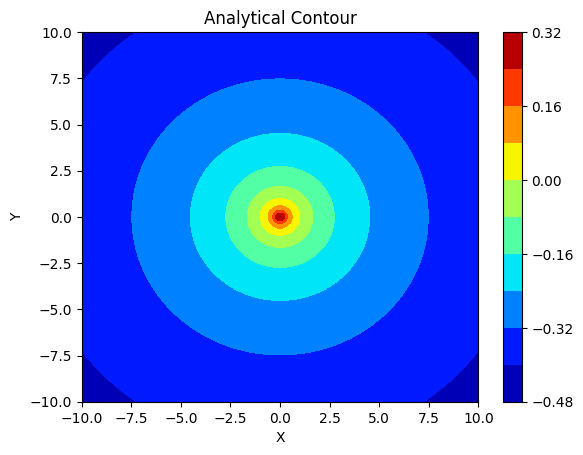

In [24]:
fig, axs = plt.subplots(1, 1)
phi_n_contour = axs.contourf(X, Y, phi, cmap="jet", levels=10)
axs.set_title("Analytical Contour")
axs.set_xlabel("X")
axs.set_ylabel("Y")
fig.colorbar(phi_n_contour, ax=axs)

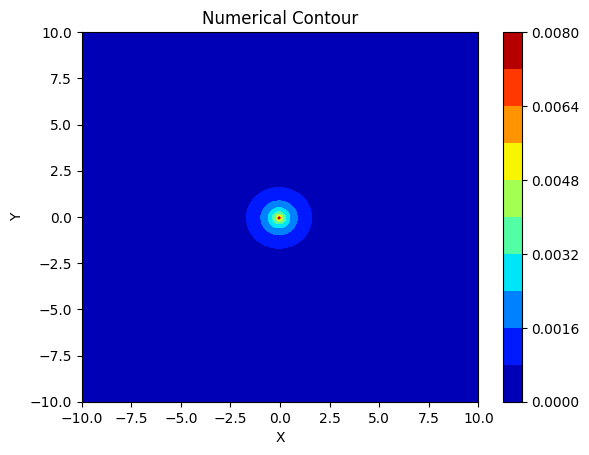

In [30]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 200) # 20 x point / 100 
y = np.linspace(-10, 10, 200)
mid = int(len(x) / 2) - 1
X, Y = np.meshgrid(x, y)

h = x[1] - x[0]
f = np.zeros((len(x), len(y)))
u = np.zeros((len(x),len(y)))

f[mid, mid] = 1


for _ in range(1000):
    u_n = u.copy()

    for i in range(1, len(x) - 1):
        for j in range(1, len(y) - 1):
            u_n[i, j] = 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1] + h**2 * f[i, j])
    u = u_n
# u[:, 0] = 0
# u[:, -1] = 0
# u[0, :] = 0
# u[-1, :] = 0
fig, axs = plt.subplots(1, 1)
phi_n_contour = axs.contourf(X, Y, u, cmap="jet", levels=10)
axs.set_title("Numerical Contour")
axs.set_xlabel("X")
axs.set_ylabel("Y")
fig.colorbar(phi_n_contour, ax=axs)

In [ ]:
fig, axs = plt.subplots(1, 1)
phi_n_contour = axs.contourf(X, Y, u, cmap="jet", levels=10)
axs.set_title("Numerical Contour")
axs.set_xlabel("X")
axs.set_ylabel("Y")
fig.colorbar(phi_n_contour, ax=axs)

In [ ]:

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(121, projection='3d')
surf1 = ax.plot_surface(X, Y, u, cmap='jet')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$\phi_{N}(x, y)$')
fig.colorbar(surf1, ax=ax, shrink=0.5, aspect=5)
plt.tight_layout()